In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT**

In [ ]:
import os.path as osp
import requests
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import pandas as pd

from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

143.2173913043478 86.74285714285715
103.43478260869566 78.85714285714286
95.47826086956522 63.08571428571429
87.52173913043478 39.42857142857143
63.65217391304348 23.65714285714286
103.43478260869566 86.74285714285715
95.47826086956522 165.6
135.2608695652174 173.4857142857143
39.78260869565217 110.4
63.65217391304348 189.25714285714287
87.52173913043478 228.68571428571428
63.65217391304348 118.28571428571429
103.43478260869566 173.4857142857143
143.2173913043478 173.4857142857143
79.56521739130434 94.62857142857143


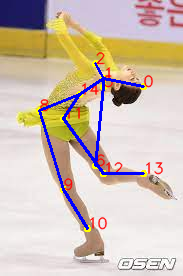

In [ ]:

BODY_PARTS = {"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
              "Background": 15}


POSE_PAIRS = [["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
              ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
              ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"]]

# setting network
protoFile='/content/drive/MyDrive/pose_deploy_linevec_faster_4_stages.prototxt'
weightsFile='/content/drive/MyDrive/pose_iter_160000.caffemodel'
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

image = cv2.imread('/content/drive/MyDrive/yuna.jpeg')
imageHeight, imageWidth, imageColor = image.shape

#이미지 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output=net.forward()

H = output.shape[2]
W = output.shape[3]

# points 이미지에 입력
points = []
for i in range(0, 15):
    probMap = output[0, i, :, :]


    #(9.076588321477175e-05, 0.27673089504241943, (17, 11), (10, 12))
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / W
    y = (imageHeight * point[1]) / H

    print(x,y)

    if prob > 0.1:
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1,
                   lineType=cv2.FILLED)  # circle(그릴곳, 원의 중심, 반지름, 색)
        cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1,
                    lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else:
        points.append(None)

# 관절들 선으로 연결
for pair in POSE_PAIRS:
    partA = pair[0]  # Head
    partA = BODY_PARTS[partA]  # 0
    partB = pair[1]  # Neck
    partB = BODY_PARTS[partB]  # 1

    # print(partA," 와 ", partB, " 연결\n")

    if points[partA] and points[partB]:
        cv2.line(image, points[partA], points[partB], (255, 0, 0), 2)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

143.2173913043478 86.74285714285715


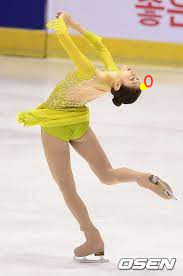

In [ ]:
# setting network
protoFile='/content/drive/MyDrive/pose_deploy_linevec_faster_4_stages.prototxt'
weightsFile='/content/drive/MyDrive/pose_iter_160000.caffemodel'
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

image = cv2.imread('/content/drive/MyDrive/yuna.jpeg')
imageHeight, imageWidth, imageColor = image.shape

#이미지 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output=net.forward()

H = output.shape[2]
W = output.shape[3]

Head = 0

points = []

probMap = output[0, 0, :, :]

minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

# 원래 이미지에 맞게 점 위치 변경
x = (imageWidth * point[0]) / W
y = (imageHeight * point[1]) / H

print(x,y)

if prob > 0.1:
  cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1,
  lineType=cv2.FILLED)  # circle(그릴곳, 원의 중심, 반지름, 색)
  cv2.putText(image, "{}".format(0), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1,
                    lineType=cv2.LINE_AA)
  points.append((int(x), int(y)))
else:
  points.append(None)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# vgg

input_shape = (224, 224, 3)

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)


output = Flatten()(VGG_model.output)
output = Dense(512, activation='relu')(output)
output = Dense(256, activation='relu')(output)
output = Dense(14, activation='sigmoid')(output)

VGG_model = Model(inputs=VGG_model.input, outputs=output)
VGG_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

이렇게하면 관절값이 있는지 없는지에 대한 확률값이 output으로 나옴

In [ ]:
from PIL import Image
import numpy as np

VGG_model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/yuna.jpeg'

#img size 224, 224
img_pil = Image.open(img_path).resize((224, 224))
img = np.array(img_pil)
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
print(x.shape)
features = VGG_model.predict(x)
print(features)
print(features.shape)

(1, 224, 224, 3)
1/1 [==============================] - 0s 134ms/step
(1, 7, 7, 512)


In [ ]:
filter_size = 3
pool_size = 2

CNN_model = Sequential([
  keras.Input(shape=(7,7,512)),

#1layer
  Conv2D(filters = 50, kernel_size = (3,3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(filters = 50, kernel_size = (3,3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=pool_size),

#2layer
  Conv2D(filters = 50, kernel_size = (3,3), padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Conv2D(filters = 50, kernel_size = filter_size, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D(pool_size=pool_size),

  Flatten(),
  Dense(50),
  Activation('relu'),

  Dense(10),
  Activation('relu'),

  Dense(2),

])

CNN_model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 7, 7, 50)          230450    
                                                                 
 batch_normalization_80 (Bat  (None, 7, 7, 50)         200       
 chNormalization)                                                
                                                                 
 activation_120 (Activation)  (None, 7, 7, 50)         0         
                                                                 
 conv2d_81 (Conv2D)          (None, 7, 7, 50)          22550     
                                                                 
 batch_normalization_81 (Bat  (None, 7, 7, 50)         200       
 chNormalization)                                                
                                                                 
 activation_121 (Activation)  (None, 7, 7, 50)       

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/데기인팀플/checkpoint"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)



CNN_model.compile(
  'adam',
  loss='mse', #회귀, losee=mse
  metrics=['accuracy'],
)



k= CNN_model.predict(features, verbose=0)
k=k[0]
predicted_x, predicted_y=k

print(predicted_x, predicted_y)

0.66513807 -1.8716452


21.2844181060791 59.89264678955078


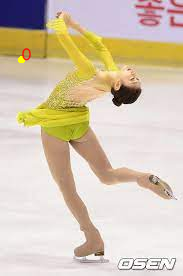

In [ ]:
import os.path as osp
import requests
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

input_size = (224, 224)
feature_map_size = (7, 7)

img_path = '/content/drive/MyDrive/yuna.jpeg'
img = cv2.imread(img_path)

x= (predicted_x * input_size[0] / feature_map_size[0])
y= (predicted_y * input_size[1] / feature_map_size[1])

print(x, y)

cv2.circle(img, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
cv2.putText(img, "{}".format(0), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
points.append((int(x), int(y)))

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()